![](img/Extrapolation.png)

In [1]:
require(HistData)
require(dplyr)
males = GaltonFamilies[GaltonFamilies$gender == 'male',]
males.ext = males[, c('mother', 'father', 'childHeight')]
males.ext = mutate(males.ext, mother.sqr = mother^2, father.sqr = father^2)
str(males.ext)

Loading required package: HistData
Warning message:
"package 'HistData' was built under R version 3.3.2"Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



'data.frame':	481 obs. of  5 variables:
 $ mother     : num  67 66.5 66.5 64 64 64 58.5 58.5 58.5 68 ...
 $ father     : num  78.5 75.5 75.5 75 75 75 75 75 75 74 ...
 $ childHeight: num  73.2 73.5 72.5 71 70.5 68.5 72 69 68 76.5 ...
 $ mother.sqr : num  4489 4422 4422 4096 4096 ...
 $ father.sqr : num  6162 5700 5700 5625 5625 ...


In [2]:
males.ext[, c('mother', 'father', 'mother.sqr', 'father.sqr')] = 
        lapply(males.ext[, c('mother', 'father', 'mother.sqr', 'father.sqr')], scale)
str(males.ext)

'data.frame':	481 obs. of  5 variables:
 $ mother     : num [1:481, 1] 1.2779 1.0625 1.0625 -0.0143 -0.0143 ...
  ..- attr(*, "scaled:center")= num 64
  ..- attr(*, "scaled:scale")= num 2.32
 $ father     : num [1:481, 1] 4.06 2.76 2.76 2.54 2.54 ...
  ..- attr(*, "scaled:center")= num 69.1
  ..- attr(*, "scaled:scale")= num 2.31
 $ childHeight: num  73.2 73.5 72.5 71 70.5 68.5 72 69 68 76.5 ...
 $ mother.sqr : num [1:481, 1] 1.2958 1.0702 1.0702 -0.0326 -0.0326 ...
  ..- attr(*, "scaled:center")= num 4106
  ..- attr(*, "scaled:scale")= num 296
 $ father.sqr : num [1:481, 1] 4.31 2.86 2.86 2.63 2.63 ...
  ..- attr(*, "scaled:center")= num 4785
  ..- attr(*, "scaled:scale")= num 320



Call:
lm(formula = childHeight ~ mother + father, data = males.ext)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5389 -1.5534  0.2212  1.5060  9.0880 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  69.2341     0.1047 661.520  < 2e-16 ***
mother        0.7633     0.1052   7.258 1.61e-12 ***
father        0.9628     0.1052   9.154  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.295 on 478 degrees of freedom
Multiple R-squared:  0.2379,	Adjusted R-squared:  0.2347 
F-statistic: 74.62 on 2 and 478 DF,  p-value: < 2.2e-16


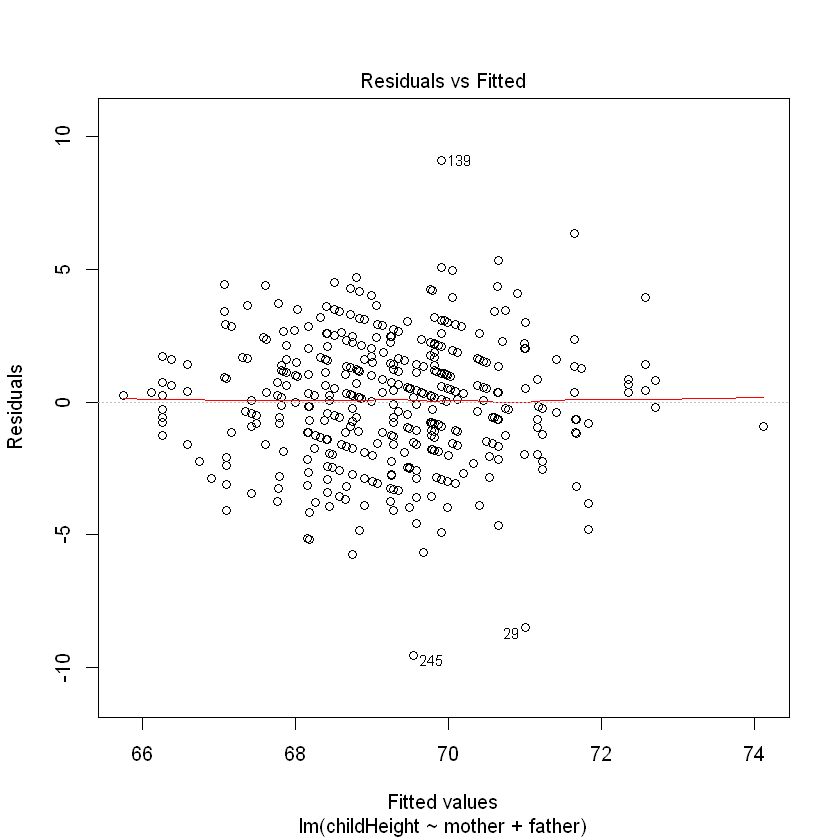

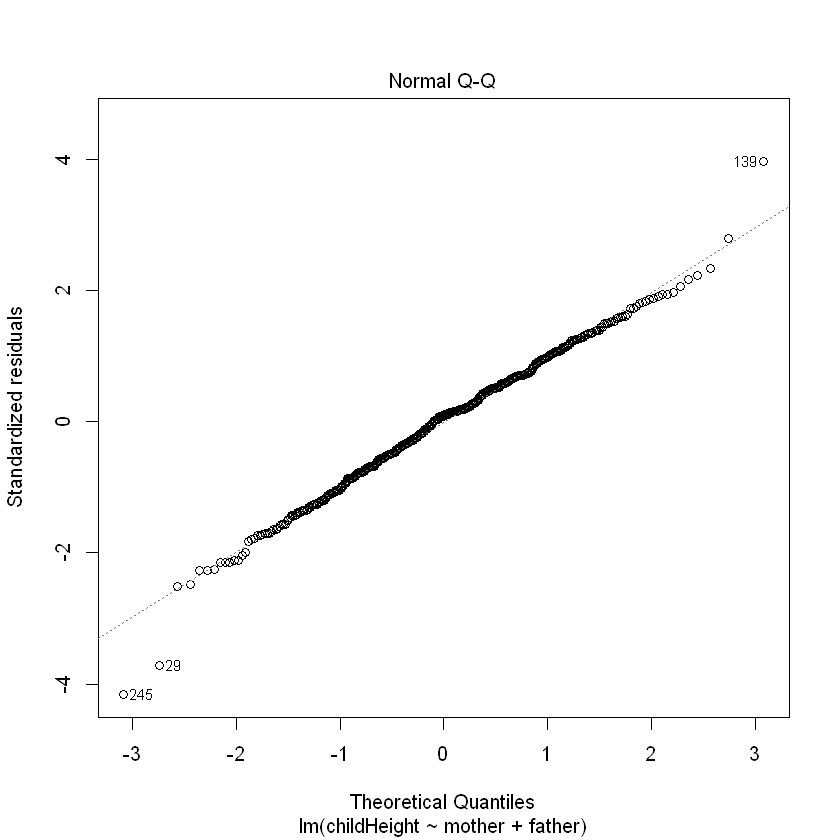

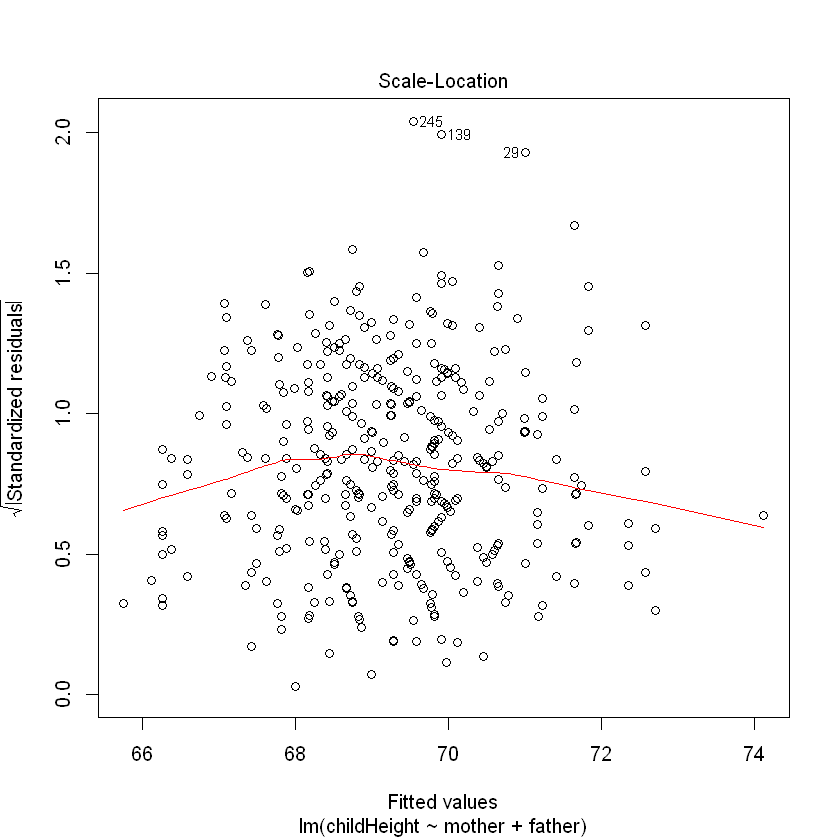

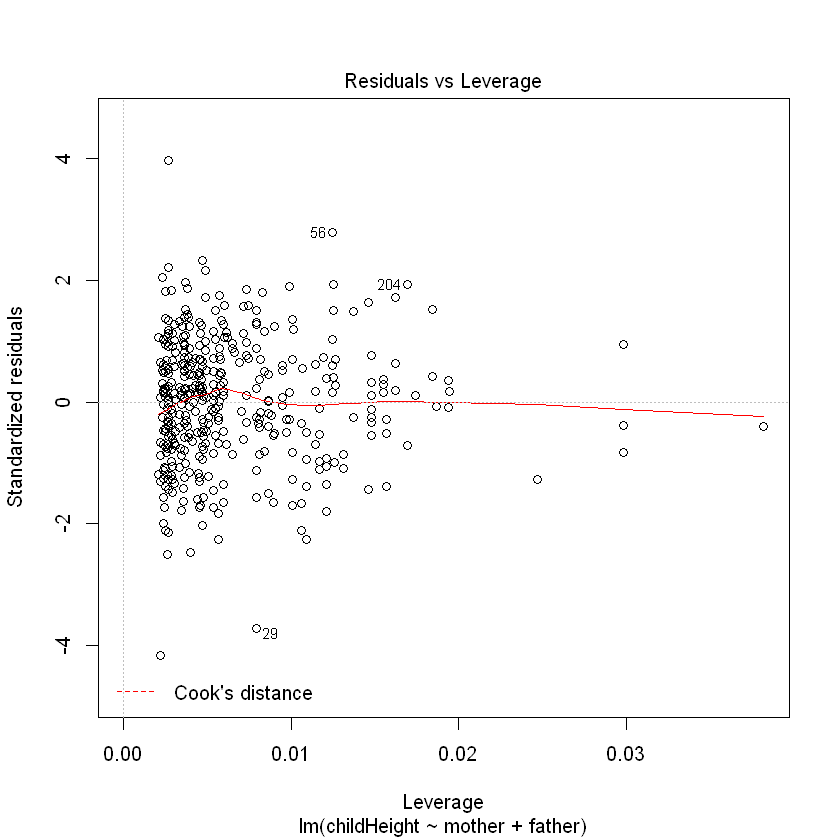

In [3]:
lm.simple = lm(childHeight ~ mother + father, data = males.ext)
summary(lm.simple)
plot(lm.simple)


Call:
lm(formula = childHeight ~ ., data = males.ext)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5150 -1.5506  0.1913  1.5282  9.1044 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  69.2341     0.1048 660.506   <2e-16 ***
mother       -2.0659     4.1774  -0.495    0.621    
father        2.3489     4.0186   0.584    0.559    
mother.sqr    2.8319     4.1785   0.678    0.498    
father.sqr   -1.3913     4.0197  -0.346    0.729    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.299 on 476 degrees of freedom
Multiple R-squared:  0.2388,	Adjusted R-squared:  0.2324 
F-statistic: 37.33 on 4 and 476 DF,  p-value: < 2.2e-16


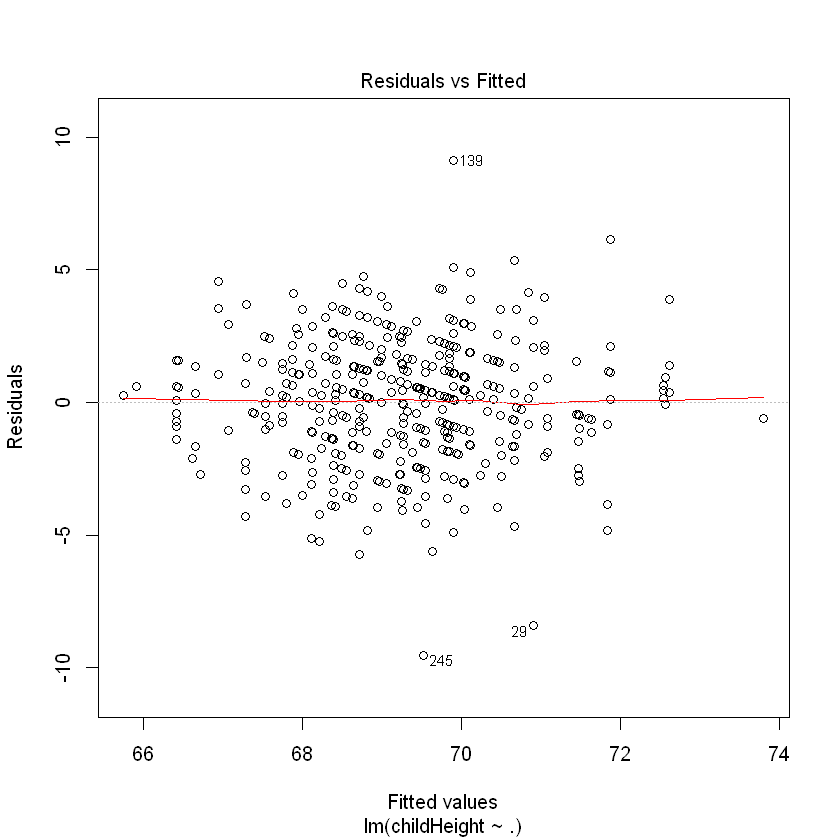

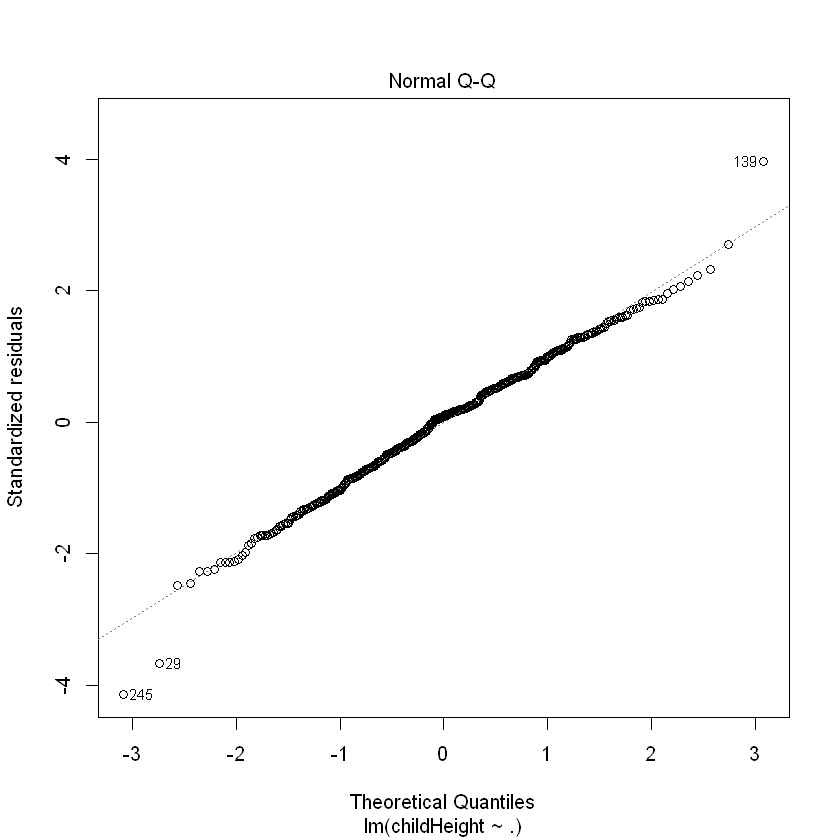

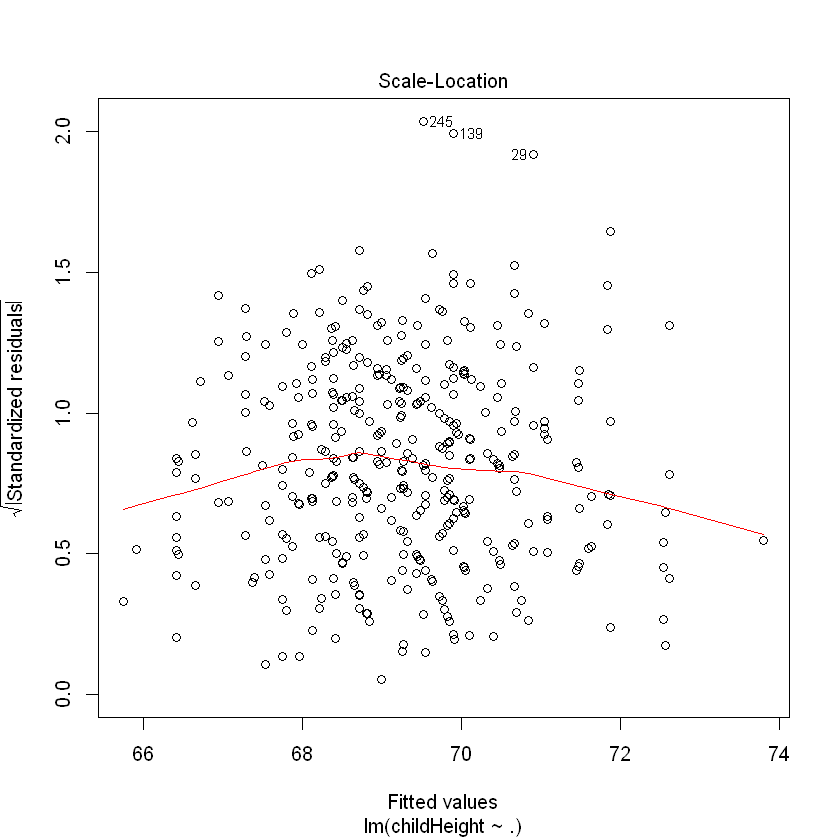

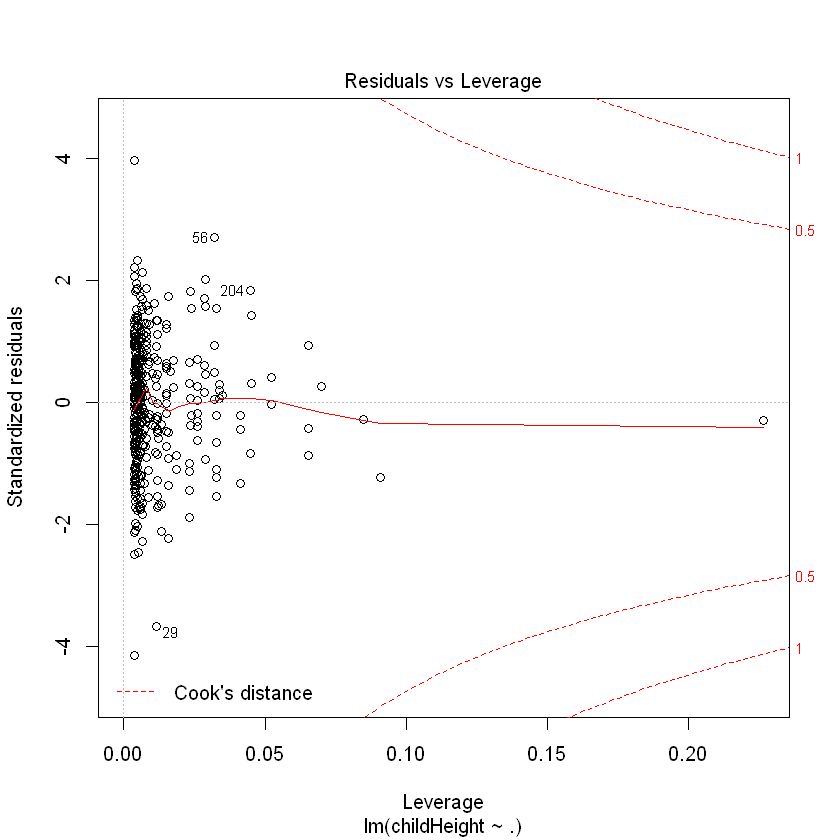

In [4]:
lm.males = lm(childHeight ~ ., data = males.ext)
summary(lm.males)
plot(lm.males)


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



Start:  AIC=805.76
childHeight ~ mother + father + mother.sqr + father.sqr

             Df Sum of Sq    RSS    AIC
- father.sqr  1   0.63311 2516.2 803.88
- mother      1   1.29252 2516.9 804.01
- father      1   1.80550 2517.4 804.11
- mother.sqr  1   2.42749 2518.0 804.23
<none>                    2515.6 805.76

Step:  AIC=803.88
childHeight ~ mother + father + mother.sqr

             Df Sum of Sq    RSS    AIC
- mother      1      1.13 2517.3 802.10
- mother.sqr  1      2.20 2518.4 802.30
<none>                    2516.2 803.88
+ father.sqr  1      0.63 2515.6 805.76
- father      1    435.77 2952.0 878.71

Step:  AIC=802.1
childHeight ~ father + mother.sqr

             Df Sum of Sq    RSS    AIC
<none>                    2517.3 802.10
+ mother      1      1.13 2516.2 803.88
+ father.sqr  1      0.47 2516.9 804.01
- mother.sqr  1    278.59 2795.9 850.58
- father      1    440.17 2957.5 877.61


Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,476,2515.579,805.7622
- father.sqr,1,0.6331102,477,2516.213,803.8832
- mother,1,1.1274094,478,2517.340,802.0987



Call:
lm(formula = childHeight ~ father + mother.sqr, data = males.ext)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5264 -1.5642  0.1983  1.5130  9.0977 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  69.2341     0.1046 661.661  < 2e-16 ***
father        0.9614     0.1052   9.142  < 2e-16 ***
mother.sqr    0.7649     0.1052   7.273 1.45e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.295 on 478 degrees of freedom
Multiple R-squared:  0.2383,	Adjusted R-squared:  0.2351 
F-statistic: 74.76 on 2 and 478 DF,  p-value: < 2.2e-16


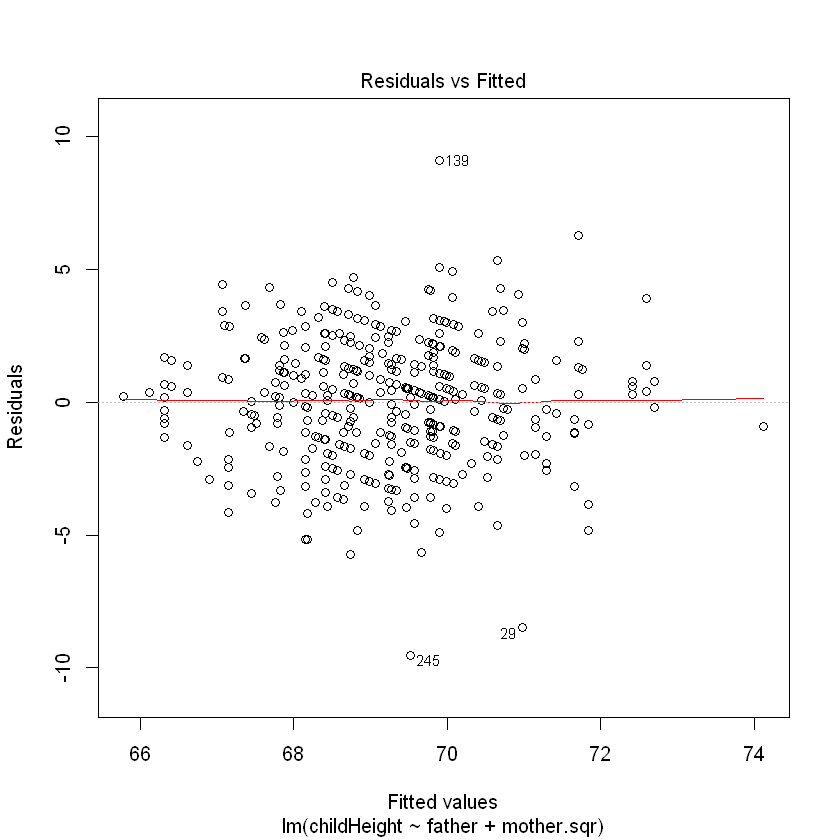

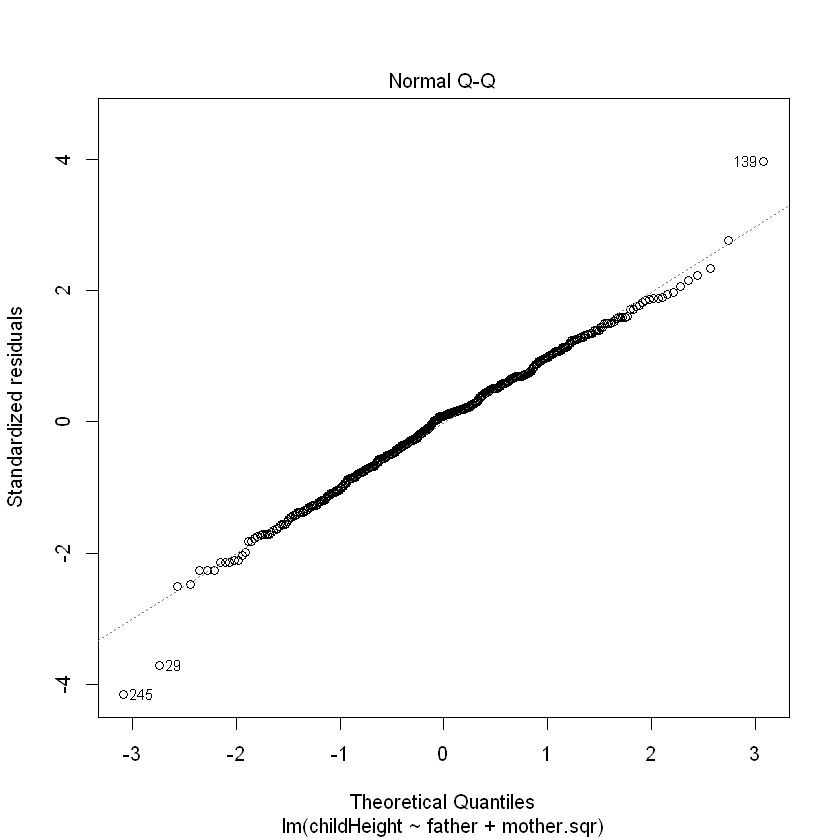

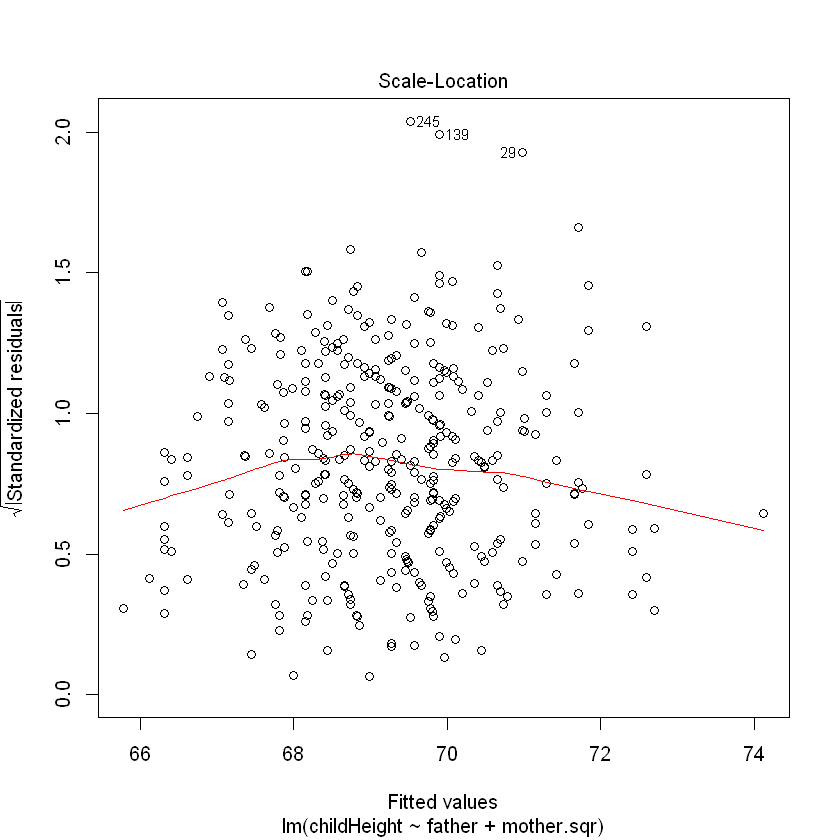

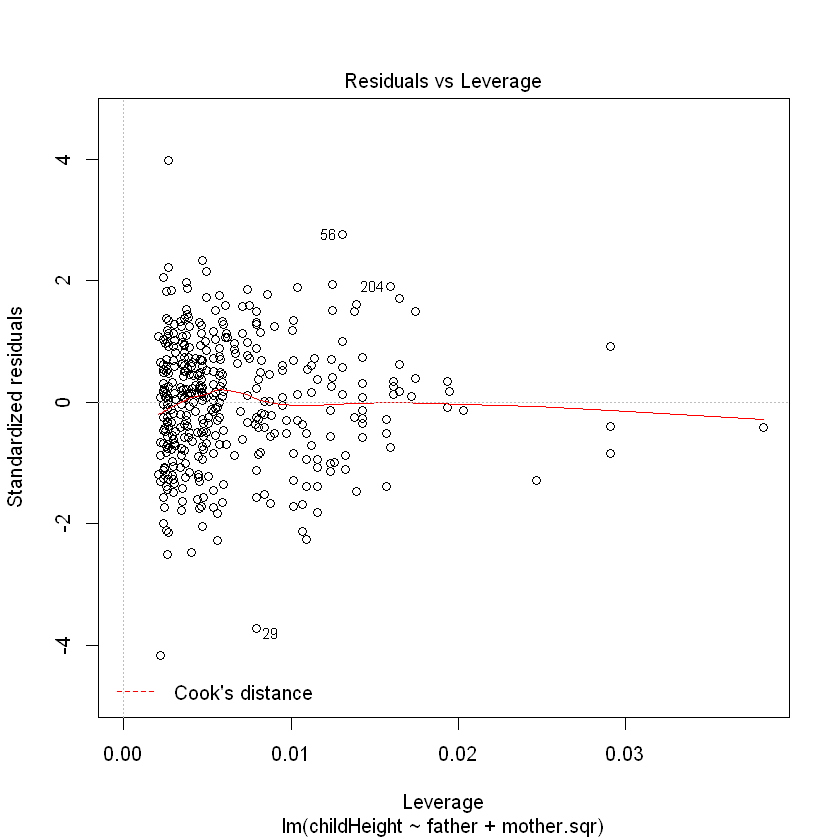

In [5]:
library(MASS)
lm.step = stepAIC(lm.males, direction = 'both')
lm.step$anova # ANOVA of the result 
summary(lm.step) # Summary of the best model
plot(lm.step)


Call:
lm(formula = childHeight ~ mother * father, data = males.ext)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5351 -1.5428  0.2078  1.4898  9.0870 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   69.22986    0.10508 658.861  < 2e-16 ***
mother         0.76052    0.10540   7.216 2.12e-12 ***
father         0.95966    0.10543   9.102  < 2e-16 ***
mother:father  0.04853    0.09593   0.506    0.613    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.297 on 477 degrees of freedom
Multiple R-squared:  0.2383,	Adjusted R-squared:  0.2336 
F-statistic: 49.76 on 3 and 477 DF,  p-value: < 2.2e-16


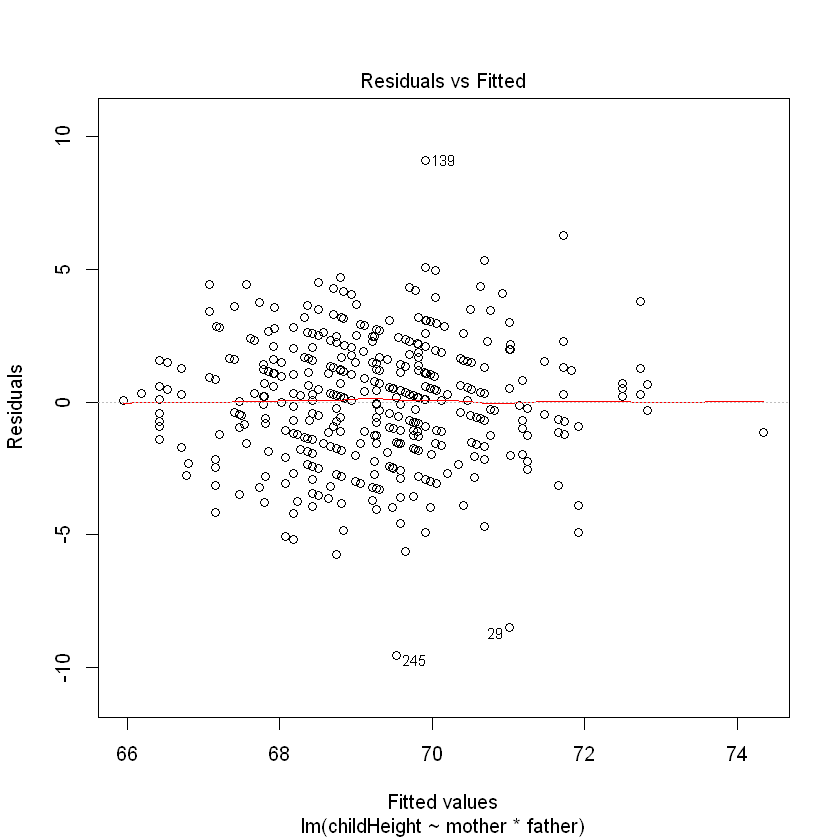

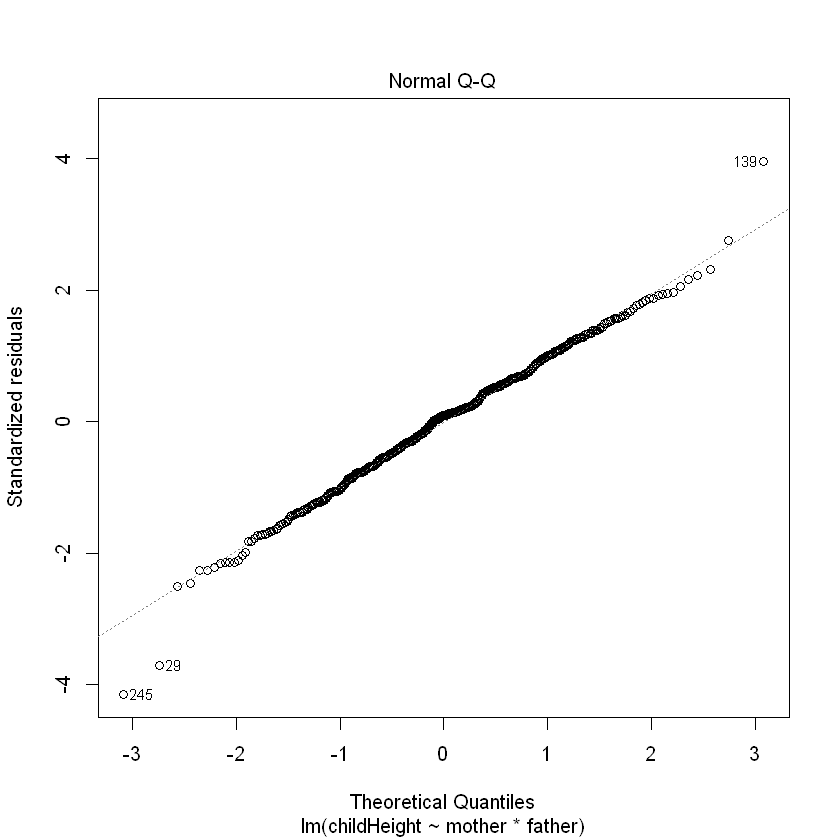

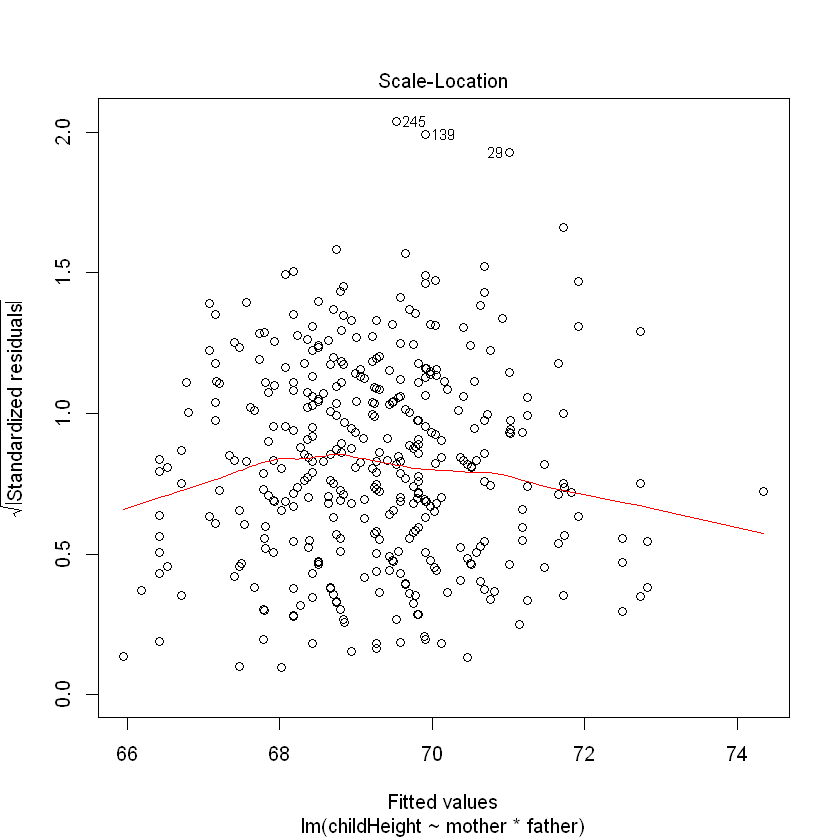

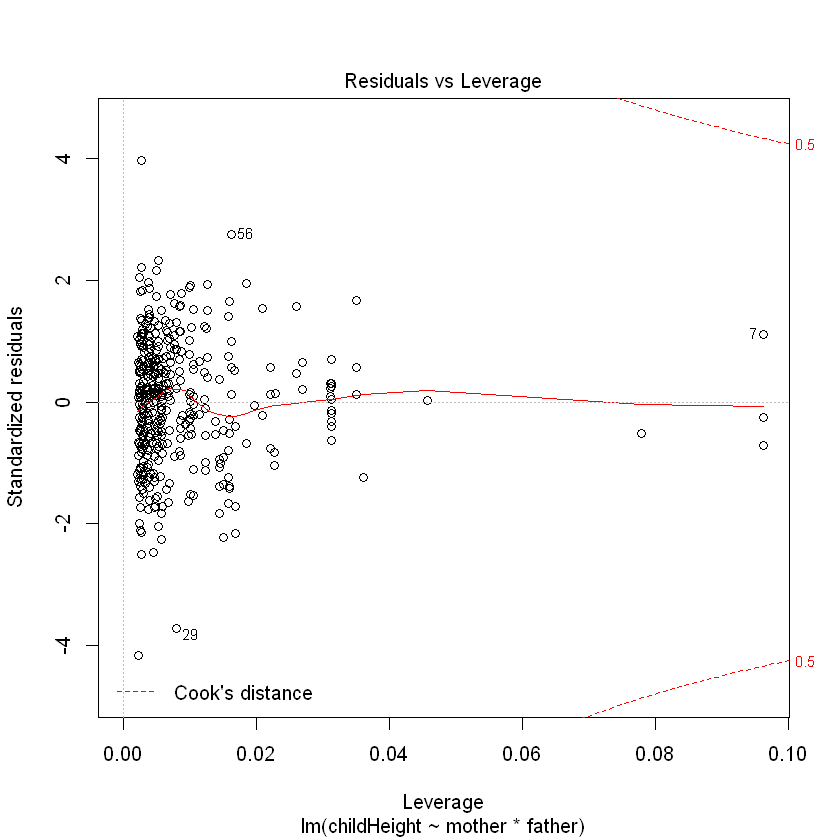

In [6]:
lm.interaction = lm(childHeight ~ mother*father, data = males.ext)
summary(lm.interaction)
plot(lm.interaction)

In [7]:
anova(lm.step, lm.simple)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
478,2517.340,NA,NA,NA,NA
478,2518.416,0,-1.076283,NA,NA


## Linear Algebra Review

Let's review some basic linear algebra.

**Note**, a simple reference guide to common linear algebra operations in R can be found at on the [Quick R website](http://www.statmethods.net/advstats/matrix.html)


Let $A$  and $B$ be $m = 4$ rows by $n = 3$ column matrices. 

In [8]:
A = matrix(4, nrow = 4, ncol = 3)
A
B = matrix(1:12, nrow = 4, ncol = 3)
B

4,4,4
4,4,4
4,4,4
4,4,4


1,5,9
2,6,10
3,7,11
4,8,12


We can perform some arithmatic operations element by element on these matrces.

In [9]:
A + B
A * B

5,9,13
6,10,14
7,11,15
8,12,16


4,20,36
8,24,40
12,28,44
16,32,48


We can also create vectors of length 3.

In [10]:
a = rep(2, 3)
a
b = 1:3
b

[1] 2 2 2

[1] 1 2 3

We can perform some basic element-wise arithmetic opertions on vectors.

In [11]:
a + b
a * b

[1] 3 4 5

[1] 2 4 6

We can also compute the dot or **inner product** of two vectors of equal lenght.

$$dot\ product = \Sigma_i^n a_i \cdot b_i$$

Give this a try by executing the code in the cell below.

In [12]:
t(a) %*% b

12


The square root of the inner product of a vector with itself is the length or $L2$ norm of the vector.

$$\parallel a \parallel = length\ of\ vector\ a = \sqrt{a \cdot a}$$

**Your Turn:** Create and exectue the code to compute the length or norm of the vector `a` in the cell below.

In [13]:
sqrt(a %*% a)

3.464102


We can also write the dot product as:

$$a \cdot b = \parallel a \parallel \parallel b \parallel cos(\theta)\\
or \\
cos(\theta) = \frac{a \cdot b}{\parallel a \parallel \parallel b \parallel}$$

Notice that the inner product of orthogonal vectors is $0$. Run the code in the cell below to see an example.

In [14]:
aa = c(1, 0, 0)
bb = c(0, 1, 1)
t(aa) %*% bb

0


We can multiply a $mxn$ matrix by a vector of length $n$ by taking the inner product of each row of the matrix and the vector. The result in a vector of length $n$. Each element of the result can be written at:

$$y_i = \Sigma_j^m A_{ij} \cdot b_j$$

Run the code in the cell below and examine the result. 

In [15]:
A %*% b

24
24
24
24


But what if we multipy to matrices? In matrix multiplcation each element of the resulting matrix is the inner product of a row by a column. For example, the element $Y_{ij}$ of the result matrix is computed as follows:

$$Y_{ij} = \Sigma_j^m A_{ij} \cdot B_{ji}$$

Notice that the number of columns, $m$, of the first matrix must equal the number of rows of second matrix. And, that the number of rows, $n$ of the first matrix must equal the number of columns of the second metrix. In this case, the two matricies are said to be **conformable**. 

Give matrix multiplication a try by exectuing the code in the cell bellow.

In [16]:
A %*% B

ERROR: Error in A %*% B: non-conformable arguments


That operation failed! Evidently these matrices are not conformable. 

But, what if we take the transpose of $B$? The **transpose** of a matrix is just that matrix with the row and column indicies permuted like this:

$$B_{ji}^T = B_{ij}\\
where \\
B\ has\ dimensions\ n x m \\
and \\
B^T\ has\ dimensions\ m x n$$ 

If we multiply an $n x m$ matix by an $m x n$ matrix the result is a square $n x n$ matrix. Run the code in the cell below to see the result:

In [17]:
AB = A %*% t(B)
AB

60,72,84,96
60,72,84,96
60,72,84,96
60,72,84,96


We can define the **indentity** matrix having ones on the diagonal and zeros elsewehere.

$$I = \begin{bmatrix}
    1  & 0 & 0 & \dots & 0 \\
    0  & 1 & 0 & \dots & 0 \\
    \vdots &\vdots &\vdots & & \vdots \\
    0 & 0 & 0 & \dots & 1
\end{bmatrix}$$

The identity multiplied by any matrix gives that matrix. If $AB$ is a rectangular matrix then:

$$AB = I \cdot AB = AB \cdot I$$

In [18]:
I = diag(c(1, 1, 1, 1))
I
AB %*% I
I %*% AB

1,0,0,0
0,1,0,0
0,0,1,0
0,0,0,1


60,72,84,96
60,72,84,96
60,72,84,96
60,72,84,96


60,72,84,96
60,72,84,96
60,72,84,96
60,72,84,96


In principle we can compute an inverse of a matrix so that:

$$A = A\\
A = AI \\
A^{-1}A = I$$

We need a decompositon of $A$ that alows us to compute $A^{-1}$. One possibility is a method called singular value decomposiion or SVD:

$$svd(A) = U D V^{\ast}$$

Where,
- $U$ are the orthogonal unit norm left singular vectors.
- $V$ are the orthogonal unit norm right singular vectors, and $V^{\ast}$ is the conjugate transpose. For real-valued $A$ this is just $V^T$.
- $D$ is a diagonal matrix of singular values, which are said to define a **spectrum**.
- $A$ is comprised of the linear combination of singular vectors scaled by singular values.

To compute the SVD of a matrix and view the results execute the code in the cell below.

In [19]:
SVD = svd(B)
SVD

-0.4036176,-0.7328662,-0.2819388
-0.4647441,-0.2898498,0.7259267
-0.5258707,0.1531666,-0.6060371
-0.5869972,0.5961831,0.1620492
-0.2067359,0.8891533,-0.4082483
-0.5182887,0.2543818,0.8164966
-0.8298416,-0.3803896,-0.4082483


You can verify that the singular vectors form a orthonomal basis by executing the code in the cell below:

In [20]:
t(SVD$u) %*% SVD$u
SVD$v %*% t(SVD$v)

1.000000e+00,0.00000e+00,1.110223e-16
0.000000e+00,1.00000e+00,1.942890e-16
1.110223e-16,1.94289e-16,1.000000e+00


1.000000e+00,5.551115e-17,0
5.551115e-17,1.000000e+00,0
0.000000e+00,0.000000e+00,1


The result are two identity matricies, one of dimension $n x n$ and the other of dimenstion $m x m$.

We can view the product of the matrix $A$ with a vector as defining a scaled rotation rotation and scaling. The singular value decomposition of $A$ can be viewe as:

- A first rotation defined by the unit norm singular values $V^{\ast}$.
- A scaling defined by the diagonal singular value matrix $D$.
- A second rotation defined by the unit norm singular values $U$.

This geometric interpertation can be visualized as shown in the figure below.

![](img/SVD.png)

Execute the code in the cell below and examine the rotations and scaling of the inital vector.

In [21]:
e = sqrt(1/3)
u = c(e, e, e)
u
sqrt(u %*% u)
cat('The first rotation')
u = t(SVD$v) %*% u
u
sqrt(t(u) %*% u)
cat('The scaling')
u = diag(SVD$d) %*% u
u
sqrt(t(u) %*% u)
cat('The second rotation')
u = SVD$u %*% u
u
sqrt(t(u) %*% u)

[1] 0.5773503 0.5773503 0.5773503

1


The first rotation

-8.977024e-01
4.406023e-01
-2.775558e-17


1


The scaling

-2.283471e+01
7.589869e-01
-4.006225e-32


22.84732


The second rotation

8.660254
10.392305
12.124356
13.856406


22.84732


**Your Turn:** Verify that the singular value decomposition is equal to the original matrix. Compute $U D V^T$. Make sure you use the full diagonal matrix of the singular values using the R code, `diag(SVD$d)`.

In [22]:
SVD$u %*% diag(SVD$d) %*% t(SVD$v)

1,5,9
2,6,10
3,7,11
4,8,12


The question now is, how do we compute $A^{-1}$ from its SVD? In most cases, there is no exact representation. But, we can come close using the **pseudo inverse** also known as the **penrose inverse**, which is defined as:

$$A^\dagger = V D^+ U^*$$

The matrix may not be of full rank. A long and narrow $n x m$ matrix is **rank deficient** if it has one or more of the $m$ sigular values  $d_i  \sim 0.0$. In this case we truncate $D$ and %U% to have dimensions consistent with the singular values where  $d_i  > 0.0$. In fact, we want $d_i$ to be significanlty greater than $0$. In this case:

A rank deficient matrix arrises when there is linear dependency between one or more of the columns. As an example, a matrix with correlated (not necessiarily perfectly correlated) columns is bound to be rank deficient. 

- $D^+$ is the square diagonal matrix of **inverse sigular values** significantly greater than $0$. All other terms are set to $0$.
- $U^*$ is the transpose of the left sigular value matrix with columns with indices with $d_i  \sim 0.0$ removed., In other words, the $U$ matrix is truncated so that it **mataches the rank of the original matrix**. 

Let's try an example. The code in the cell below computes the SVD of a matrix of random numbers chosen from a Normal distribution. The pseudo inverse is computed and multiplied by the original matrix. Execute this code and note the result.

In [23]:
cat('Create a matrix of random values')
C = matrix(rnorm(9), nrow = 3, ncol = 3)
C
cat('Compute the SVD and look at the sigular values')
CSVD = svd(C)
CSVD$d
cat('The inverse matrix of sigular values')
D = diag(1/CSVD$d)
D
cat('The pseudo inverse of the matrix')
cInv = CSVD$v %*% D %*% t(CSVD$u)
cInv
cat('The pseudo inverse times the matrix')
cInv %*% C

Create a matrix of random values

1.0667891,-0.6782308,0.05141068
-0.2447801,1.0744439,1.23893055
0.2647099,-0.1426487,0.22727739


Compute the SVD and look at the sigular values

[1] 1.80849737 1.10162539 0.08836705

The inverse matrix of sigular values

0.5529452,0.0000000,0.00000
0.0000000,0.9077496,0.00000
0.0000000,0.0000000,11.31644


The pseudo inverse of the matrix

2.390927,0.8339153,-5.086658
2.178840,1.2998857,-7.578773
-1.417182,-0.1553989,5.567587


The pseudo inverse times the matrix

1.000000e+00,1.110223e-16,0
4.440892e-16,1.000000e+00,0
0.000000e+00,-3.330669e-16,1


In [24]:
cat('Create a matrix of random values')
C = matrix(rnorm(16), nrow = 4, ncol = 4)
C[, 4] = 0.4 * C[, 1] + 0.2 * C[, 2] + 0.4 * C[, 3]
C
cat('Compute the SVD and look at the sigular values')
CSVD = svd(C)
CSVD$d
cat('The inverse matrix of sigular values')
D = diag(1/CSVD$d)
D
cat('The pseudo inverse of the matrix')
cInv = CSVD$v %*% D %*% t(CSVD$u)
cInv
cat('The pseudo inverse times the matrix')
cInv %*% C

Create a matrix of random values

-0.05996786,0.5928413,0.2575825,0.1976141
-0.23162482,0.5352973,-0.7987814,-0.3051030
-0.06548142,0.3945194,-0.1626293,-0.0123404
-0.32096149,-1.0241157,1.6234382,0.3161675


Compute the SVD and look at the sigular values

[1] 2.2224843 0.7223593 0.3800358 0.0000000

The inverse matrix of sigular values

0.4499469,0.000000,0.000000,0
0.0000000,1.384353,0.000000,0
0.0000000,0.000000,2.631331,0
0.0000000,0.000000,0.000000,Inf


The pseudo inverse of the matrix

Inf,Inf,-Inf,-Inf
Inf,Inf,-Inf,-Inf
Inf,Inf,-Inf,-Inf
-Inf,-Inf,Inf,Inf


The pseudo inverse times the matrix

NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN


In [25]:
cat('The inverse matrix of sigular values')
D = diag(1/CSVD$d)
D[4, 4] = 0.0
D
cInv = CSVD$v %*% D %*% t(CSVD$u)
cat('The pseudo inverse times the matrix')
cInv %*% C

The inverse matrix of sigular values

0.4499469,0.000000,0.000000,0
0.0000000,1.384353,0.000000,0
0.0000000,0.000000,2.631331,0
0.0000000,0.000000,0.000000,0


The pseudo inverse times the matrix

0.88235294,-0.05882353,-0.11764706,0.2941176
-0.05882353,0.97058824,-0.05882353,0.1470588
-0.11764706,-0.05882353,0.88235294,0.2941176
0.29411765,0.14705882,0.29411765,0.2647059


## Regression with the Pseudo Inverse

We have already looked at feature selection using manual trial and error methods and stepwise regression. How can we use the pseudo inverse to create a regularized regression? 

Let's start by examining the **normal equation** formulation of the linear regresson problem. The goal is to compute a vector of **model coefficients** or weights which minimize the mean squared residuals, given a vector of data $x$ amd a **model matrix** $A$. We can write our model as:

$$x = A b$$

To solve this problem we would ideally like to compute:

$$b = A^{-1}x$$

However, this is hard to do directly in practice.

- In typical case $A$ is long and narrow. In other words we have more data **cases** than coeficients. 
- Solving for $A^{-1}$ is computationally difficult and inefficient.
- Solution is numerically unstable if $A$ is rank deficient. 

A commonly used alternative form can help:

$$b = (A^TA)^{-1}A^Tx$$

Now, $A^TA$ is an $m x m$ matrix. But, **$A^TA$ can still be rank deficient!** In this case, we can use the pseudo inverse $A^\dagger$.

As a first step we need to create a model matrix of the features for the Gaulton height data. 

In [26]:
M = as.matrix(males.ext[, c('mother', 'father', 'mother.sqr', 'father.sqr')])
MTM = t(M) %*% M
MTM

,mother,father,mother.sqr,father.sqr
mother,480.00000,42.00128,479.84641,42.46252
father,42.00128,480.00000,42.76013,479.83447
mother.sqr,479.84641,42.76013,480.00000,43.25339
father.sqr,42.46252,479.83447,43.25339,480.00000


The next step is to compute the SVD of the resulting matrix and examine the singular values. 

**Your Turn:** In the cell below, create and execute the code to compute the SVD decomposition of the matrix $MTM$ and examine the singular values. 

In [27]:
mSVD = svd(MTM)
mSVD$d

[1] 1045.0794890  874.6022539    0.1763169    0.1419402

In [28]:
cat('Compute and print the inverse singular value matrix')
d.trim = rep(0, 4)
d.trim[1:2] =1/ mSVD$d[1:2]
mD = diag(d.trim)
mD
cat('Compute and print the pseudo inverse')
mInv = mSVD$v %*% mD %*% t(mSVD$u)
mInv
cat('Compute and print the dimensions of the matrix MTMTM')
MTMTM = mInv %*% t(M)
dim(MTMTM)

Compute and print the inverse singular value matrix

0.000956865,0.000000000,0,0
0.000000000,0.001143377,0,0
0.000000000,0.000000000,0,0
0.000000000,0.000000000,0,0


Compute and print the pseudo inverse

5.252093e-04,-4.732390e-05,5.250568e-04,-4.679327e-05
-4.732390e-05,5.251569e-04,-4.646242e-05,5.250631e-04
5.250568e-04,-4.646242e-05,5.249057e-04,-4.593202e-05
-4.679327e-05,5.250631e-04,-4.593202e-05,5.249699e-04


Compute and print the dimensions of the matrix MTMTM

[1]   4 481

In [29]:
b = MTMTM %*% males.ext$childHeight
b

0.3815145
0.4807031
0.3822420
0.4810431


Loading required package: repr
Warning message:
"package 'repr' was built under R version 3.3.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.2"Loading required package: gridExtra

Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

`geom_smooth()` using method = 'loess'
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


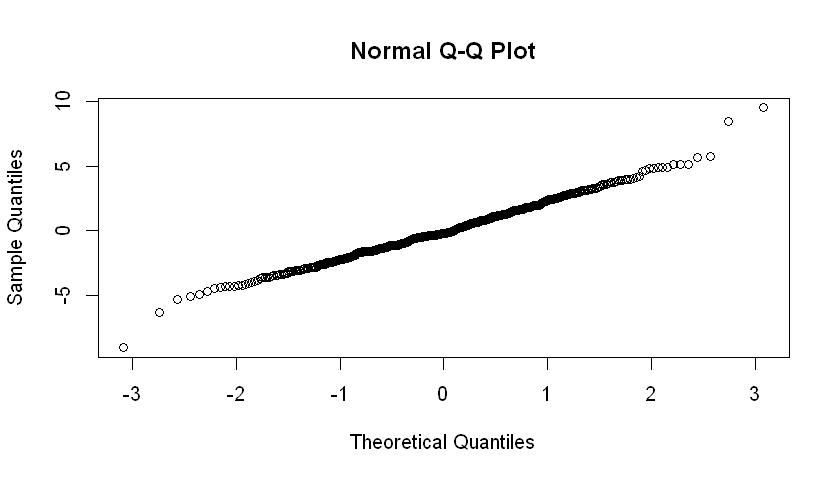

`geom_smooth()` using method = 'loess'


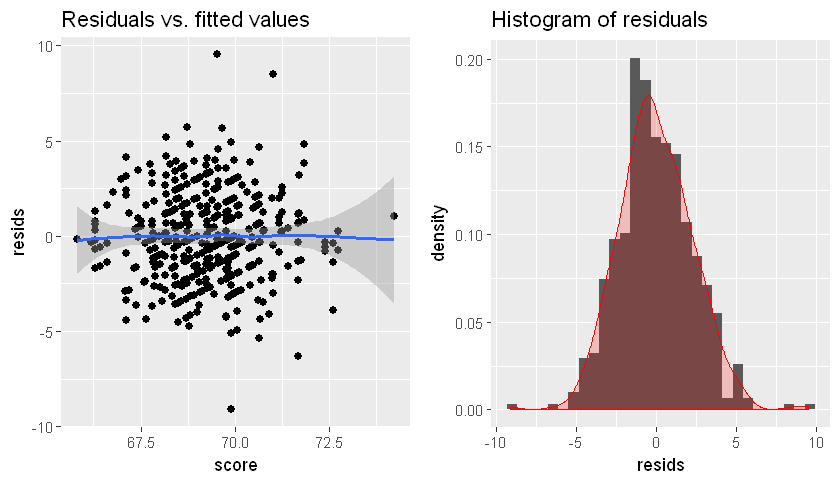

SSE = 786.464830338432 
SSR = 2518.2760012624 
SST = 3304.74083160083 
RMSE = 1.64188899861886 
Adjusted R^2 = 0.231577266155491 


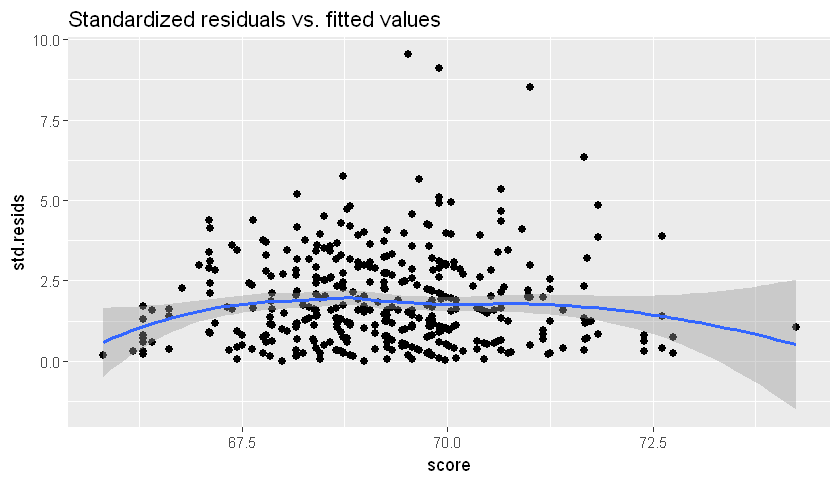

In [30]:
males.ext$score = M %*% b + mean(males.ext$childHeight)
males.ext$resids = males.ext$score - males.ext$childHeight

require(repr)
options(repr.pmales.extlot.width=8, repr.plot.height=4)

plot.svd.reg <- function(df, k = 4){
  require(ggplot2)
  require(gridExtra)
  
  p1 <- ggplot(df) + 
            geom_point(aes(score, resids), size = 2) + 
            stat_smooth(aes(score, resids)) +
            ggtitle('Residuals vs. fitted values')
 
  p2 <- ggplot(df, aes(resids)) +
           geom_histogram(aes(y = ..density..)) +
           geom_density(color = 'red', fill = 'red', alpha = 0.2) +
           ggtitle('Histogram of residuals')

  qqnorm(df$resids)
    
  grid.arrange(p1, p2, ncol = 2)
    
  df$std.resids = sqrt((df$resids - mean(df$resids))^2)  
    
  p3 = ggplot(df) + 
            geom_point(aes(score, std.resids), size = 2) + 
            stat_smooth(aes(score, std.resids)) +
            ggtitle('Standardized residuals vs. fitted values')
  print(p3) 
    
  n = nrow(df)
  Ybar = mean(df$childHeight)
  SST <- sum((df$childHeight - Ybar)^2)
  SSR <- sum(df$resids * df$resids)
  SSE = SST - SSR
  cat(paste('SSE =', as.character(SSE), '\n'))
  cat(paste('SSR =', as.character(SSR), '\n'))
  cat(paste('SST =', as.character(SSE + SSR), '\n'))
  cat(paste('RMSE =', as.character(SSE/(n - 2)), '\n'))

  adjR2  <- 1.0 - (SSR/SST) * ((n - 1)/(n - k - 1))
  cat(paste('Adjusted R^2 =', as.character(adjR2)), '\n')
}

plot.svd.reg(males.ext)